<a href="https://colab.research.google.com/github/magda-pohoata/UBB-Mathematics-and-Computer-Science/blob/main/Deep_Learning__GD_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
from sklearn.metrics import log_loss
from csv import reader
from numpy import linalg as LA

import numpy as np
import matplotlib.pyplot as plt
import sklearn

import random
import math
from matplotlib.animation import FuncAnimation

# Enable interactive plot
#%matplotlib notebook

**Initialization**


The next cell contains component of a simple neural network architecture as well as functions for creating and interacting with a generated dataset of points on a 2-dimensional plane.


In [ ]:
"""
The sigmoid, ReLU and softsign functions are activation functions. In neural networks, activation functions are non-linear functions used to determine the output of the network as a value between 0 or 1.
"""

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def softsign(x):
  s=x / (abs(x) + 1)
  return s


def relu(x):
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss).
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    loss -- the loss function 
    """
        
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    #a3 = sigmoid(z3)
    a3= softsign(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache

def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    #print(gradients)
    return gradients



def compute_loss(a3, Y):
    
    """
    Implement the loss function
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    loss - value of the loss function
    """
    
    loss=np.square(np.subtract(Y,a3)).mean()
    
    return loss

""" The following 2 are alternative loss functions but be careful in using them because the backpropagation function needs tweeking if compute loss is changed"""
def compute_loss_nll(a3, Y):
  p = Y.shape[1]
  temp = np.log(1 + np.exp(-2*Y*a3))
  loss = 1./p * np.nansum(temp)

  return loss

def compute_loss_hinge(a3, Y):
  p = Y.shape[1]
  m = 1
  temp = np.max(0, m + 2*Y*a3)
  loss = 1./p * np.nansum(temp)
 
  return loss



def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0:
            p[0,i] = 1
        else:
            p[0,i] = -1

    # print results
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    def compute_loss_hinge(a3, Y):
  p = Y.shape[1]
  m = 1
  temp = max(0, m + 2*Y*a3)
  loss = 1./p * np.nansum(temp)
 
  return loss
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        ### END CODE HERE ###
        
    return parameters

Gradient Descent
 

The following cell contains different variations of the gradient descent algorithm.

In [ ]:
def update_parameters_GD(parameters, grads, learning_rate,X, Y, cache):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of n_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters['W' + str(i)] = ... 
                  parameters['b' + str(i)] = ...
    """
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    L = len(parameters) // 2 # number of layers in the neural networks
    #print("update")
    #print(a3.shape)
    # Update rule for each parameter
    #print(parameters["W1"])

    for k in range(L):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]

    return parameters, learning_rate

def update_parameters_adrGD(parameters, grads, learning_rate, X, Y, cache):
    """
    Update parameters using gradient descent with adaptive stepsize
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of n_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters['W' + str(i)] = ... 
                  parameters['b' + str(i)] = ...
    """
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    L = len(parameters) // 2 # number of layers in the neural networks
    #print("update")
    #print(a3.shape)
    # Update rule for each parameter
    parameters_list= []
    grads_list=[]
    next_parameters_list= []
    next_grads_list=[]
    c=0.5
    k=0
    
    for k in range(L):

        parameters_list= parameters_list+list(parameters["W" + str(k+1)])
        parameters_list= parameters_list+list(parameters["b" + str(k+1)])
        #parameters_list= np.concatenate((np.array(parameters_list),parameters["b" + str(k+1)][:,None]),axis=1)
        grads_list= grads_list+ list(grads["dW" + str(k+1)])
        grads_list= grads_list+ list(grads["db" + str(k+1)])
        #grads_list= np.concatenate((np.array(grads_list),np.array(list(grads["b" + str(k+1)]))))
        
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        #print(learning_rate)

        next_parameters_list= next_parameters_list+list(parameters["W" + str(k+1)])
        next_parameters_list= next_parameters_list+list(parameters["b" + str(k+1)])
        #next_parameters_list= np.concatenate(np.array(next_parameters_list),np.array(list(parameters["b" + str(k+1)])))


    _, cache = forward_propagation(X, parameters)
    next_grads=backward_propagation(X, Y, cache)

    k=0
    for k in range(L):
      next_grads_list= next_grads_list+ list(next_grads["dW" + str(k+1)])
      next_grads_list= next_grads_list+ list(next_grads["db" + str(k+1)])

    

    parameters_array=[]
    next_parameters_array=[]
    grads_array=[]
    next_grads_array=[]

    for array in parameters_list:
      for i in array:
        parameters_array.append(i)

    parameters_array=np.array(parameters_array)

    for array in next_parameters_list:
      for i in array:
        next_parameters_array.append(i)

    next_parameters_array=np.array(next_parameters_array)

    for array in grads_list:
      for i in array:
        grads_array.append(i)

    grads_array=np.array(grads_array)

    for array in next_grads_list:
      for i in array:
        next_grads_array.append(i)

    next_grads_array=np.array(next_grads_array)


    #print("parameters_list: ",parameters)
    temp= (next_parameters_array-parameters_array) 
    
    #temp= (next_parameters_array - parameters_array) / (next_grads_array - grads_array) 
    
    K=  c * LA.norm(temp) ** 2 / np.inner((next_grads_array - grads_array), (next_parameters_array - parameters_array))
    learning_rate= (2*learning_rate*K)/(learning_rate+K)

    #print(learning_rate)
    return parameters, learning_rate 

Dataset Generate and how to use


THe following cell containss functions related to genrating and manipulating a dataset of points in 2D plane with each point belonging to one of 2 classes (red/blue points)

Different functions can be used to define which points are red and which are blue such as: a simple oval function, cassini ovals, tanh etc..

In [ ]:


def load_cat_dataset():
    """ In case we want to ead a dataset from files we can use thisfunction"""

    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    train_set_x_orig = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
    test_set_x_orig = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
    
    train_set_x = train_set_x_orig/255
    test_set_x = test_set_x_orig/255

    return train_set_x, train_set_y, test_set_x, test_set_y, classes


def plot_decision_boundary(model, X, y):
    
    """this function is used to plot the decision boundary of the trained neural network"""
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples

    #print(yy.shape)
    #print(Z.shape)
    cont=plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    return cont
    #plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    #plt.show()
    
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3>0)
    return predictions

def is_inside(x,y):

  """ used to output 1 or -1 depending wheter the point will be of class red or class blue, in this case we decide the class boundaries with an oval function."""
  d = math.sqrt(x**2+y**2)
  if d <= 1:
    return 1
  else:
    return -1

def is_inside_cassini(x,y):
  """ used to output 1 or -1 depending wheter the point will be of class red or class blue, in this case we decide the class boundaries with cassini ovals  function."""
  a=1.1
  c=1
  d=(x**2+y**2)**2 - 2 * c**2*(x**2-y**2) - (a**4-c**4)
  if d <= 0:
    return 1
  else:
    return -1

def is_inside_sincos(x,y):
  """ used to output 1 or -1 depending wheter the point will be of class red or class blue, in this case we decide the class boundaries with sin cos  function."""
  d=math.sin(x+y)-math.cos(x*y)+1

  if d <= 0:
    return 1
  else:
    return -1


def generatePoints(minX, maxX, minY, maxY):
  """ here we generate the points and decide the class they belong to based of the is_inside functions"""
  X = random.uniform(minX, maxX)
  Y = random.uniform(minY, maxY)

  return X,Y

def load_dataset():
    """save points in arrays"""

    train_X = np.empty([2,300])
    train_Y = np.empty([1,300])
    test_X = np.empty([2,100])
    test_Y = np.empty([1,100])

    for i in range(0, 300):
      x,y=generatePoints(-1.5,1.5,-1.5,1.5)
      d=is_inside(x,y)
      train_X[0][i]=x
      train_X[1][i]=y

      train_Y[0][i]=d
      
      if d == 1 :
        plt.plot(x, y, 'o', color='blue')
      else:
        plt.plot(x, y, 'o', color='red')

    for i in range(0, 100):
      x2,y2=generatePoints(-1.5,1.5,-1.5,1.5)
      d=is_inside(x2,y2)
      test_X[0][i]=x2
      test_X[1][i]=y2
     
      test_Y[0][i] = d

    
    return train_X, train_Y, test_X, test_Y


def load_csv_dataset():

    """used to load  the dataset from csv files """

    train_X = np.empty([2,300])
    train_Y = np.empty([1,300])
    test_X = np.empty([2,100])
    test_Y = np.empty([1,100])

    with open('/content/train_x.csv', mode='r') as csv_file:
      csv_reader = reader(csv_file)
      line_count=0
      for row in csv_reader:
        print(row)
        train_X[line_count]=row
        line_count+=1

    with open('/content/test_y.csv', mode='r') as csv_file:
      csv_reader = reader(csv_file)
      line_count=0
      for row in csv_reader:
        print(row)
        test_Y[line_count]=row
        line_count+=1

    with open('/content/train_y.csv', mode='r') as csv_file:
      csv_reader = reader(csv_file)
      line_count=0
      for row in csv_reader:
        train_Y[line_count]=row
        line_count+=1

    with open('/content/test_x.csv', mode='r') as csv_file:
      csv_reader = reader(csv_file)
      line_count=0
      for row in csv_reader:
        test_X[line_count]=row
        line_count+=1


    for i in range(0, 300):
      x=train_X[0][i]
      y=train_X[1][i]
      

      d=is_inside(x,y)
      
      if d == 1 :
          plt.plot(x, y, 'o', color='blue')
      else:
          plt.plot(x, y, 'o', color='red')

    return train_X, train_Y, test_X, test_Y

**Visualization of the generated dataset**

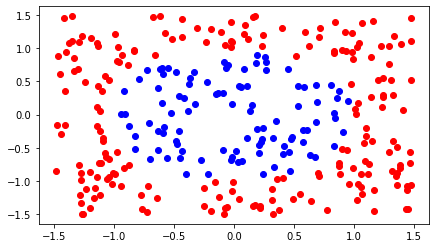

In [ ]:
#from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
#from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec


plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()


**Write the datset in csv files for future use and consistency in experiments**

In [ ]:
# Importing library 
import csv 
  
# opening the csv file in 'a+' mode 
file = open('train_x.csv', 'w', newline ='')
  
# writing the data into the file 
with file:     
    write = csv.writer(file) 
    print(train_X)
    write.writerows(train_X) 

file = open('train_y.csv', 'w', newline ='')
  
# writing the data into the file 
with file:     
    write = csv.writer(file) 
    write.writerows(train_Y) 

file = open('test_x.csv', 'w', newline ='')
  
# writing the data into the file 
with file:     
    write = csv.writer(file) 
    write.writerows(test_X) 

file = open('test_y.csv', 'w', newline ='')
  
# writing the data into the file 
with file:     
    write = csv.writer(file) 

[[ 4.11600088e-01  1.46286747e+00  4.18264652e-01  1.23217775e-01
  -7.92531255e-01  4.24245867e-01 -6.42289812e-01 -1.10152977e+00
   8.32696700e-01 -2.52892434e-01  1.14262687e+00  3.00243294e-01
  -9.39519613e-01  4.86116013e-01  2.51245466e-01 -9.10855593e-01
   8.69274805e-01 -1.42698773e+00  1.11573300e+00 -1.42638623e+00
   5.04070419e-01 -1.78690172e-01  5.21891570e-01 -8.70624864e-01
  -4.35098248e-02 -1.07302605e+00  3.22194124e-01  7.09949610e-01
   6.83572524e-01 -4.33569576e-02 -1.25279706e+00 -1.48921665e+00
  -1.34612174e+00 -8.38586350e-01  1.20441555e+00  1.77768275e-01
   1.19438364e+00 -8.64876744e-02  1.47523023e+00  9.51808138e-01
   9.66742425e-01 -8.20664848e-01  1.37537054e+00  1.15780080e+00
  -1.65819929e-01 -1.30415713e+00  1.28074160e+00 -6.29408917e-01
  -5.47685503e-01  9.32237253e-01 -1.63492949e-01 -2.60270353e-01
   8.44755532e-01  1.34230685e+00  1.64709343e-01 -2.23324401e-01
  -3.58855199e-01 -2.09818199e-01  2.21759089e-01  6.81163369e-01
  -7.62273

**Training**

Initialization and training of a neural network

In [ ]:
def model(X, Y, learning_rate = 0.01, num_iterations = 200, print_cost = True, initialization = "he", optimizer="GD", first_layer_dim=10, second_layer_dim=5):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], first_layer_dim, second_layer_dim, 1]


    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    parameters_plot=[parameters]

    # Loop (gradient descent)

    for i in range(0, num_iterations):


       
        
        
        # Forward propagation: LINEAR -train_X, train_Y, test_X, test_Y = load_dataset()> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)
        #cost= log_loss(Y,a3)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        #print(X.shape)
        #print(grads.shape)
        if optimizer=="adrGD":
          parameters,learning_rate = update_parameters_adrGD(parameters, grads, learning_rate,X, Y, cache)
        elif optimizer=="GD":
            parameters,learning_rate = update_parameters_GD(parameters, grads, learning_rate,X, Y, cache)
        else:
            print("Invalid Optimizer")
        parameters_copy=parameters.copy()
        parameters_plot.append(parameters_copy)

        #plt.title('Frame = {0:4d}'.format(i))
        #axes = plt.gca()
        #axes.set_xlim([-1.5,1.5])
        #axes.set_ylim([-1.5,1.5])

        #plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)
        #plt.pause(0.001)



        #Print the loss every 1000 iterations
        if print_cost and i % 10 == 0:
           print("Cost after iteration {}: {}".format(i, cost))
           #print(i,"  :  ", parameters)
           costs.append(cost)
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    




    return parameters, parameters_plot

**Visualization of decision boundary of NN during training** (skip this)

In [ ]:
from matplotlib import animation

def animate(frame_num, parameters):
    #print(parameters_plot[1])
    #print(frame_num)
    #print(frame_num)
    global cont
    txt_title = axes.set_title('')
    txt_title.set_text('Frame = {0:4d}'.format(frame_num))
    params=parameters[frame_num]
    cont=plot_decision_boundary(lambda x: predict_dec(params, x.T), train_X, train_Y)
    return cont
    

#plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)
_,parameters_plot= model(train_X, train_Y, optimizer="adrGD", first_layer_dim=10, second_layer_dim=5)



fig=plt.figure()

axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
anim = animation.FuncAnimation(fig, animate,frames=range(1, 200),fargs=(parameters_plot, ), interval=200)
plt.show()

**Run the training and visalise loss/entropy**

In [ ]:
parameters,_= model(train_X, train_Y, optimizer="GD", first_layer_dim=10, second_layer_dim=5)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


Cost after iteration 0: 1.0267418537578001
Cost after iteration 10: 0.8659801382360066
Cost after iteration 20: 0.8205596440194277
Cost after iteration 30: 0.8007900201317744
Cost after iteration 40: 0.7880609173869213
Cost after iteration 50: 0.778053303713758
Cost after iteration 60: 0.7688452802765491
Cost after iteration 70: 0.7599729333968831
Cost after iteration 80: 0.7512368621227425
Cost after iteration 90: 0.7426800450836051
Cost after iteration 100: 0.7342974107544404
Cost after iteration 110: 0.7260781623435579
Cost after iteration 120: 0.7180514322801708
Cost after iteration 130: 0.7100178103548657
Cost after iteration 140: 0.7019980188051178
Cost after iteration 150: 0.69403806656948
Cost after iteration 160: 0.686226955795099
Cost after iteration 170: 0.6786567019810028
Cost after iteration 180: 0.6710438755419526
Cost after iteration 190: 0.6634137870766873


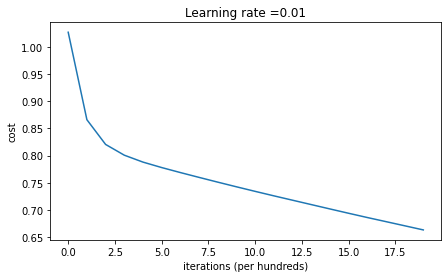

On the train set:
Accuracy: 0.72
On the test set:
Accuracy: 0.7


In [ ]:
parameters,plot = model(train_X, train_Y, initialization = "he", optimizer="GD", first_layer_dim=10, second_layer_dim=50)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


**Visualise decision boundary**



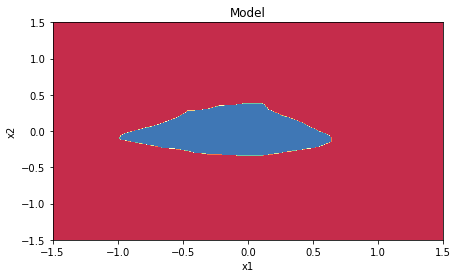

In [ ]:
plt.title("Model")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)